In [1]:
try:
    from IPython import get_ipython
    get_ipython().magic('reset -f')  
except:
    pass
from IPython import get_ipython
ipython = get_ipython().magic
import io
import os
import sys
os.chdir('/Users/markprosser/Desktop/PythonScripts')
import MCP_functions as MCP
import numpy as np
import matplotlib.pyplot as plt
import pickle
plt.close("all")

import pandas as pd
import savReaderWriter as spss
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import statsmodels.api as sm
import pylab
import seaborn as sns

/Users/markprosser/anaconda/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
savFileName = '/Users/markprosser/Desktop/PythonScripts/Input_needed_by/Stats_msc_year2/Stats_10a.sav'
with spss.SavReader(savFileName) as reader:
    records = reader.all()
df1 = pd.DataFrame(records)

In [3]:
savFileName = '/Users/markprosser/Desktop/PythonScripts/Input_needed_by/Stats_msc_year2/Stats_10b.sav'
with spss.SavReader(savFileName) as reader:
    records = reader.all()
df101 = pd.DataFrame(records)

In [4]:
df1.tail()

,0,1,2,3,4,5,6,7
29,b'GNB',b'Guinea-Bissau',2200.0,81.9,180.0,18.1,42.8894,0.0
30,b'MUS',b'Mauritius',2758.0,22.9,1100.0,41.4,31.7647,0.0
31,b'SEN',b'Senegal',2440.0,80.7,380.0,36.4,46.4894,0.0
32,b'SLE',b'Sierra Leone',1882.0,93.8,340.0,28.3,42.4466,0.0
33,b'SWZ',b'Swaziland',2506.0,34.3,800.0,26.3,48.3434,0.0


In [5]:
df1.columns = ['code', 'name', 'daycal', 'femilit', 'gnp', 'urbpop', 'under15', 'deforest']
df1.head()

,code,name,daycal,femilit,gnp,urbpop,under15,deforest
0,b'GMB',"b'Gambia, The'",2308.0,89.5,210.0,20.5,42.6471,3.125
1,b'CIV',"b""Cote d'Ivoire""",2654.0,65.7,670.0,37.6,47.4013,2.820
2,b'MWI',b'Malawi',2229.0,69.2,170.0,10.4,46.0072,2.560
3,b'NER',b'Niger',2267.0,88.7,230.0,16.2,46.1527,2.540
4,b'NGA',b'Nigeria',2244.0,68.9,850.0,31.0,46.9494,2.190


In [6]:
#10_1

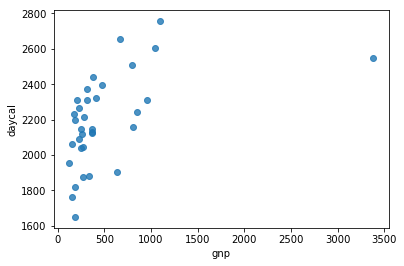

In [7]:
sns.regplot(x=df1["gnp"], y=df1["daycal"], fit_reg=False)
plt.show()

In [8]:
df1[df1['gnp']>1000]

,code,name,daycal,femilit,gnp,urbpop,under15,deforest
24,b'COG',b'Congo',2606.0,61.8,1040.0,38.0,44.7369,0.09
28,b'GAB',b'Gabon',2548.0,56.9,3380.0,40.9,36.9107,0.00
30,b'MUS',b'Mauritius',2758.0,22.9,1100.0,41.4,31.7647,0.00


In [9]:
abc = df1[df1['name']==b'Gabon']
abc

,code,name,daycal,femilit,gnp,urbpop,under15,deforest
28,b'GAB',b'Gabon',2548.0,56.9,3380.0,40.9,36.9107,0.0


In [10]:
#10_2

In [11]:
df2 = pd.DataFrame.copy(df1)
df2['gnp'] = np.log(df1['gnp'])
df2.head()

,code,name,daycal,femilit,gnp,urbpop,under15,deforest
0,b'GMB',"b'Gambia, The'",2308.0,89.5,5.347108,20.5,42.6471,3.125
1,b'CIV',"b""Cote d'Ivoire""",2654.0,65.7,6.507278,37.6,47.4013,2.820
2,b'MWI',b'Malawi',2229.0,69.2,5.135798,10.4,46.0072,2.560
3,b'NER',b'Niger',2267.0,88.7,5.438079,16.2,46.1527,2.540
4,b'NGA',b'Nigeria',2244.0,68.9,6.745236,31.0,46.9494,2.190


In [12]:
#10_3

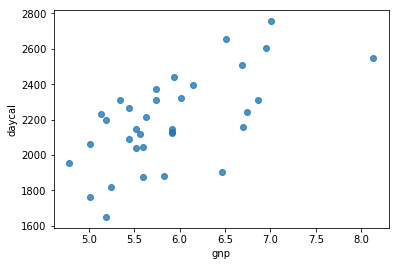

In [13]:
sns.regplot(x=df2["gnp"], y=df2["daycal"], fit_reg=False)
plt.show()

In [14]:
abc2 = stats.linregress(df2["daycal"], df2["gnp"])
print(abc2)
#pvalue is for slope

LinregressResult(slope=0.0018036140230796279, intercept=1.9378031735539816, rvalue=0.64192956363482279, pvalue=4.275137618549785e-05, stderr=0.00038084015293750963)


In [15]:
abc2_r2 = abc2[2]**2
print(abc2_r2)

0.412073564668


In [16]:
#10_5

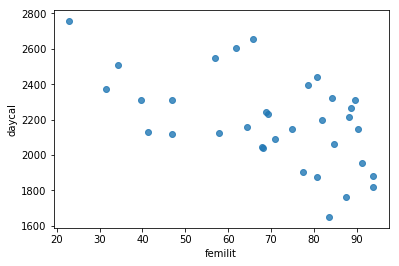

In [17]:
sns.regplot(x=df1["femilit"], y=df1["daycal"], fit_reg=False)
plt.show()

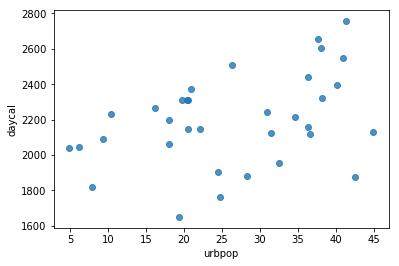

In [18]:
sns.regplot(x=df1["urbpop"], y=df1["daycal"], fit_reg=False)
plt.show()

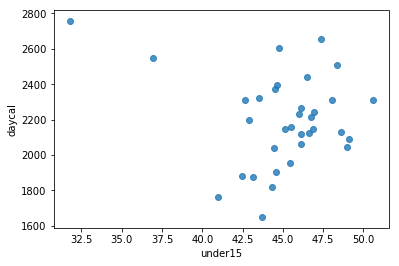

In [19]:
sns.regplot(x=df1["under15"], y=df1["daycal"], fit_reg=False)
plt.show()

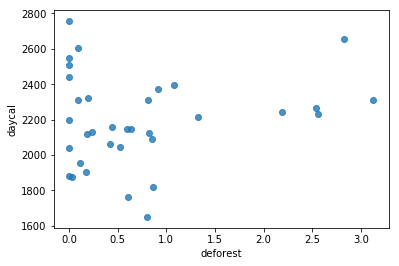

In [20]:
sns.regplot(x=df1["deforest"], y=df1["daycal"], fit_reg=False)
plt.show()

In [81]:
y =  df1['daycal'].tolist()

x1 = df2['gnp'].tolist()
x2 = df1['femilit'].tolist()
x3 = df1['urbpop'].tolist()
x4 = df1['under15'].tolist()
x5 = df1['deforest'].tolist()

#NB = VARIABLES MUST BE IN REVERSE ORDER SO THAT x1_input = x1_output etc
x = [x5, x4, x3, x2, x1]

In [83]:
import statsmodels.api as sm
def reg_m(y, x):
    ones = np.ones(len(x[0]))
    X = sm.add_constant(np.column_stack((x[0], ones)))
    for ele in x[1:]:
        X = sm.add_constant(np.column_stack((ele, X)))
    results = sm.OLS(y, X).fit()
    return results

In [84]:
print(reg_m(y, x).summary())
#OLS = ordinary least squares

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.589
Model:                            OLS   Adj. R-squared:                  0.515
Method:                 Least Squares   F-statistic:                     8.021
Date:                Sat, 09 Dec 2017   Prob (F-statistic):           8.55e-05
Time:                        16:30:38   Log-Likelihood:                -221.29
No. Observations:                  34   AIC:                             454.6
Df Residuals:                      28   BIC:                             463.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           150.6680     58.617      2.570      0.0

In [32]:
#10_7

In [86]:
y =  df1['daycal'].tolist()

x1 = df2['gnp'].tolist()
x2 = df1['femilit'].tolist()
x3 = df1['urbpop'].tolist()
x4 = df1['deforest'].tolist()

#NB = VARIABLES MUST BE IN REVERSE ORDER SO THAT x1_input = x1_output etc
x = [x4, x3, x2, x1]
print(reg_m(y, x).summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.586
Model:                            OLS   Adj. R-squared:                  0.529
Method:                 Least Squares   F-statistic:                     10.27
Date:                Sat, 09 Dec 2017   Prob (F-statistic):           2.64e-05
Time:                        16:35:50   Log-Likelihood:                -221.40
No. Observations:                  34   AIC:                             452.8
Df Residuals:                      29   BIC:                             460.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           155.9227     56.482      2.761      0.0

In [87]:
y =  df1['daycal'].tolist()

x1 = df2['gnp'].tolist()
x2 = df1['femilit'].tolist()
x3 = df1['deforest'].tolist()

#NB = VARIABLES MUST BE IN REVERSE ORDER SO THAT x1_input = x1_output etc
x = [x3, x2, x1]
print(reg_m(y, x).summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.568
Model:                            OLS   Adj. R-squared:                  0.524
Method:                 Least Squares   F-statistic:                     13.13
Date:                Sat, 09 Dec 2017   Prob (F-statistic):           1.19e-05
Time:                        16:36:19   Log-Likelihood:                -222.15
No. Observations:                  34   AIC:                             452.3
Df Residuals:                      30   BIC:                             458.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           185.9030     50.281      3.697      0.0